In [71]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import datetime, time
from datetime import date, timedelta
import matplotlib.pyplot as plt
import xgboost as xgb

# 导入和分析数据

In [72]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")
data_store = pd.read_csv("./data/store.csv")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
print(data_train.shape)
print(data_train.columns)
print(data_train.head())
print(data_train.tail())
print("Training Data Description")
print(data_train.describe())

(1017209, 9)
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      

In [75]:
print(data_test.shape)
print(data_test.columns)
print(data_test.head())
print(data_test.tail())
print("Testing Data Description")
print(data_test.describe())

(41088, 8)
Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0
          Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01  

In [76]:
print(data_store.shape)
print(data_store.columns)
print(data_store.head())
print(data_store.tail())

(1115, 10)
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0      

In [77]:
# 观察数据中NaN的情况
print("train:\n\n", data_train.isnull().sum(), "\n\nstore:\n\n", data_store.isnull().sum())

train:

 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

store:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


# 探索性数据分析

In [54]:
import seaborn as sns

Text(0.5, 1, 'Correlation Heatmap of Training Dataset')

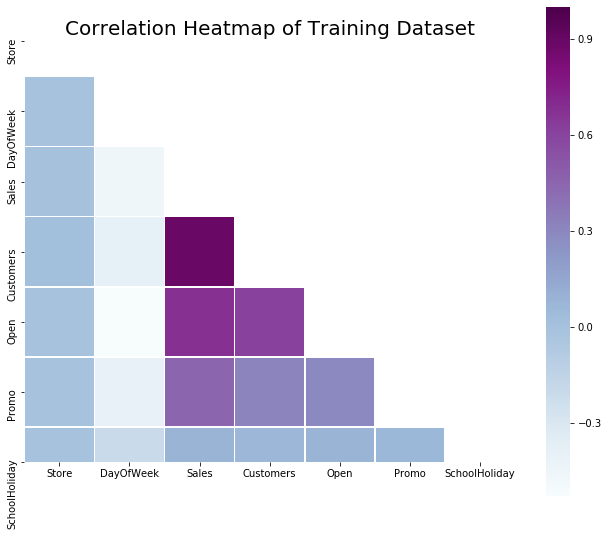

In [79]:
# 对training dataset中的数据进行相关性分析
corr = data_train.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap of Training Dataset", fontsize=20)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


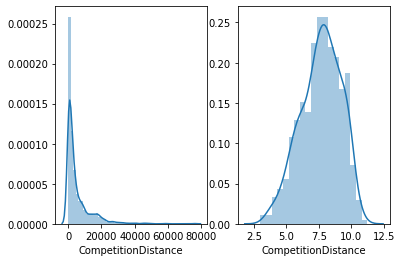

In [80]:
# 观察CompetitionDistance的分布
fig, axes =plt.subplots(1,2)
sns.distplot(data_store.CompetitionDistance.dropna(), ax = axes[0])

sns.distplot(np.log(data_store.CompetitionDistance.dropna()), ax = axes[1])
fig.show()

Text(0.5, 1.0, 'Distributin of Customers')

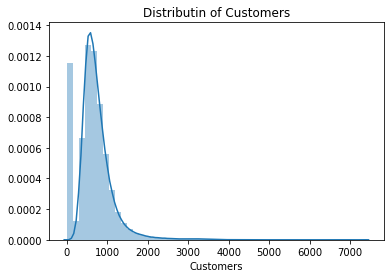

In [81]:
# 观察Customers的分布
sns.distplot(data_train.Customers.dropna())
plt.title("Distributin of Customers")

Text(0.5, 1.0, 'Distributin of Sales')

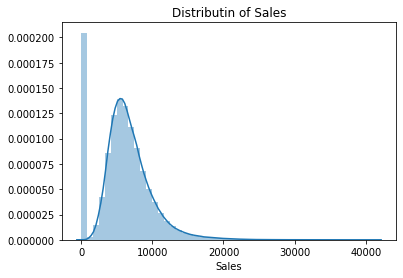

In [82]:
# 观察Sales的分布
sns.distplot(data_train.Sales.dropna())
plt.title("Distributin of Sales")

In [83]:
data_train['Date']= pd.to_datetime(data_train['Date'])

data_train['Year'] = data_train['Date'].apply(lambda x: x.year)
data_train['Month'] = data_train['Date'].apply(lambda x: x.month)
data_train['Day'] = data_train['Date'].apply(lambda x: x.day)
data_train['WeekofYear'] = data_train['Date'].apply(lambda x: x.week)
data_train['DayofYear'] = data_train['Date'].apply(lambda x: x.dayofyear)

In [84]:
def plotter(StringA , StringB):
  fig, axes = plt.subplots(2,1)
  fig.set_size_inches(15, 10)
  sns.barplot(x=StringA, y=StringB, data=data_train ,hue="DayOfWeek", ax = axes[0])
  sns.boxplot(x=StringA, y=StringB, data=data_train ,hue="DayOfWeek", ax=axes[1])

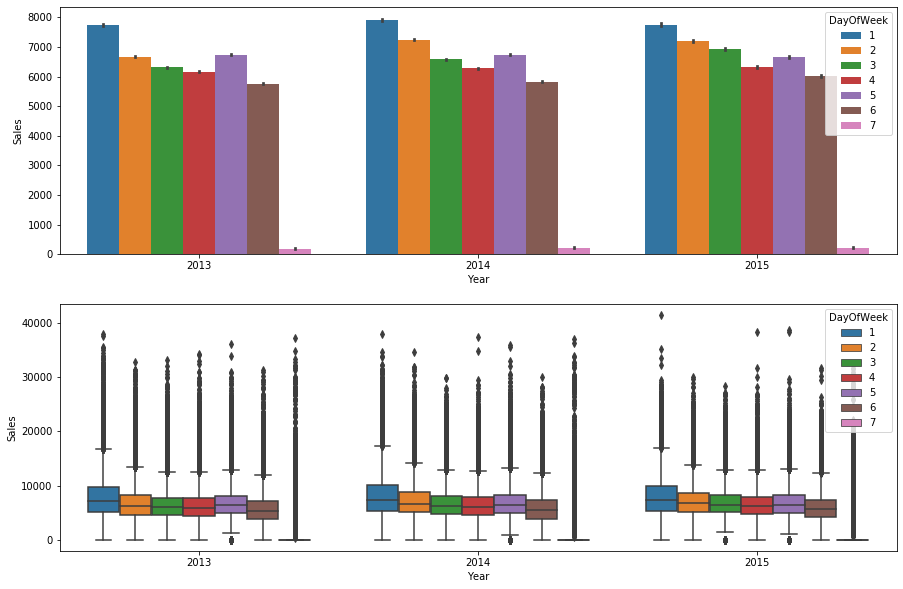

In [85]:
# 观察Sales和Year以及DayOfWeek的关系
plotter("Year" , "Sales")

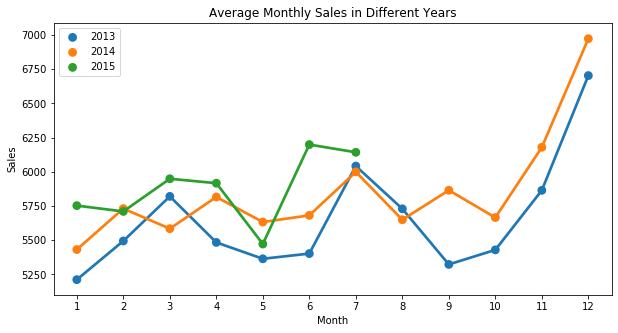

In [78]:
# 观察Sales和Year以及Month的关系
df_temp1=data_train.Sales.groupby([data_train.Year,data_train.Month]).mean().reset_index()
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.pointplot(x='Month',y='Sales',hue='Year',data=df_temp1,ax=ax)
ax.set_title('Average Monthly Sales in Different Years')
plt.legend(loc='best')

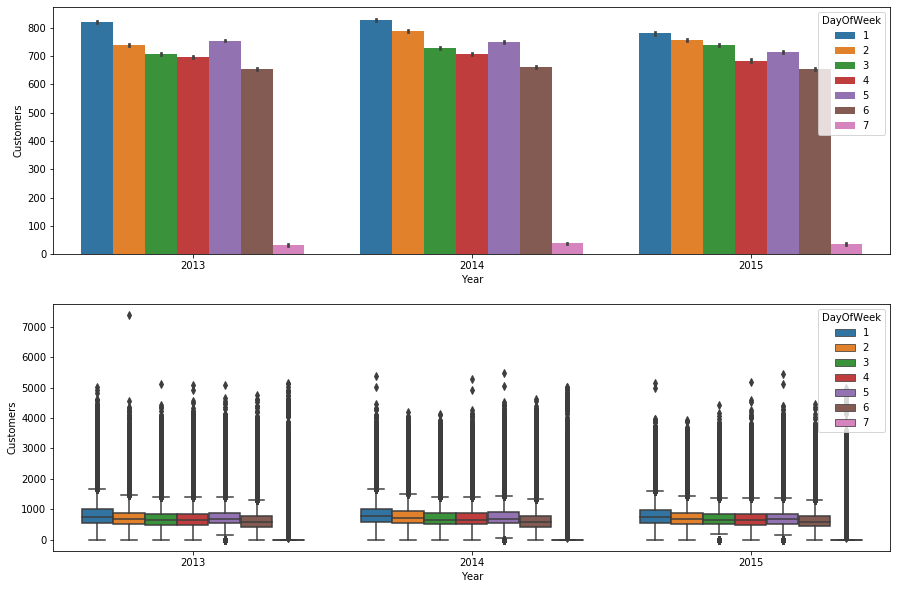

In [89]:
# 观察Customers和Year以及DayOfWeek的关系
plotter("Year" , "Customers")

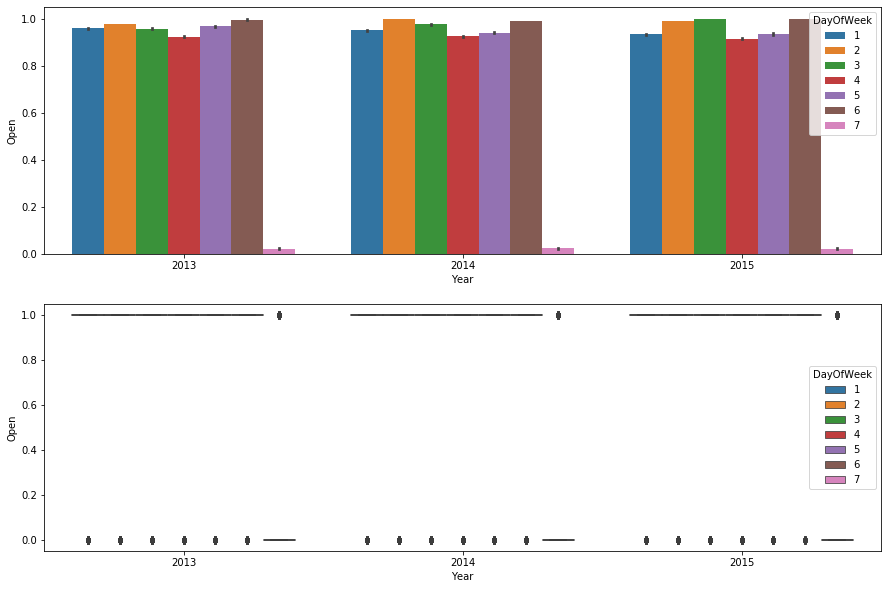

In [87]:
# 观察Open和Year以及DayOfWeek的关系
plotter("Year", "Open")

In [98]:
temp = []
for i in data_train.groupby('Store')[["Sales", "Customers"]].mean()["Sales"]:
  temp.append(i)
data_store["Sales"] = temp

In [101]:
def plotter_mod(StringA , StringB):
  fig, axes = plt.subplots(3,1)
  fig.set_size_inches(12, 15)
  sns.barplot(x=StringA, y=StringB, data=data_store, hue="StoreType", ax = axes[0])
  sns.boxplot(x=StringA, y=StringB, data=data_store,hue="StoreType", ax=axes[1])
  sns.violinplot(x=StringA, y=StringB, data=data_store, hue="StoreType" , ax=axes[2])

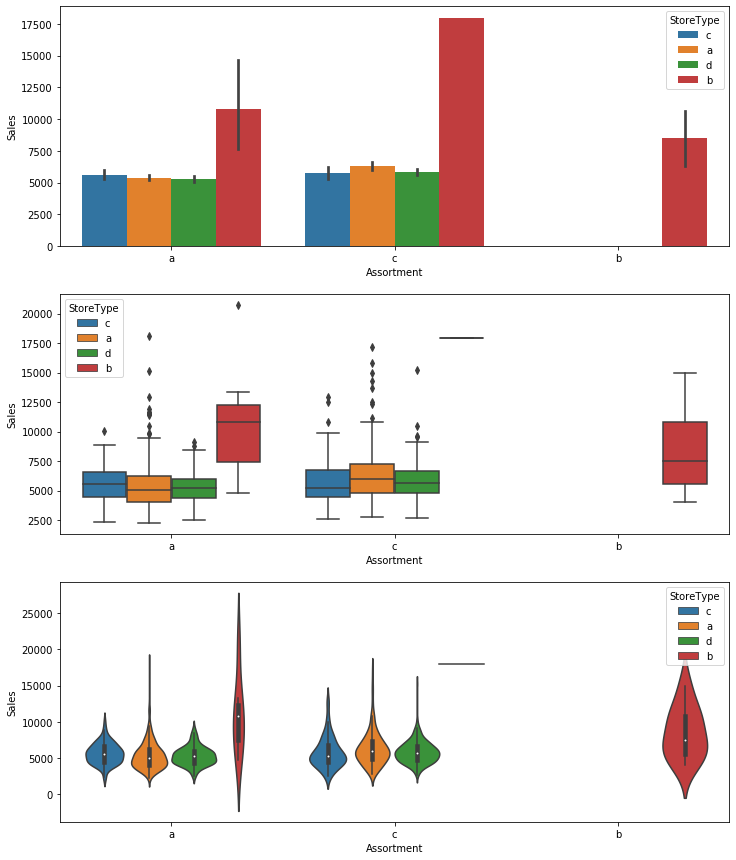

In [102]:
# 观察Assortment和StoreType以及Sales的关系
plotter_mod("Assortment" , "Sales")

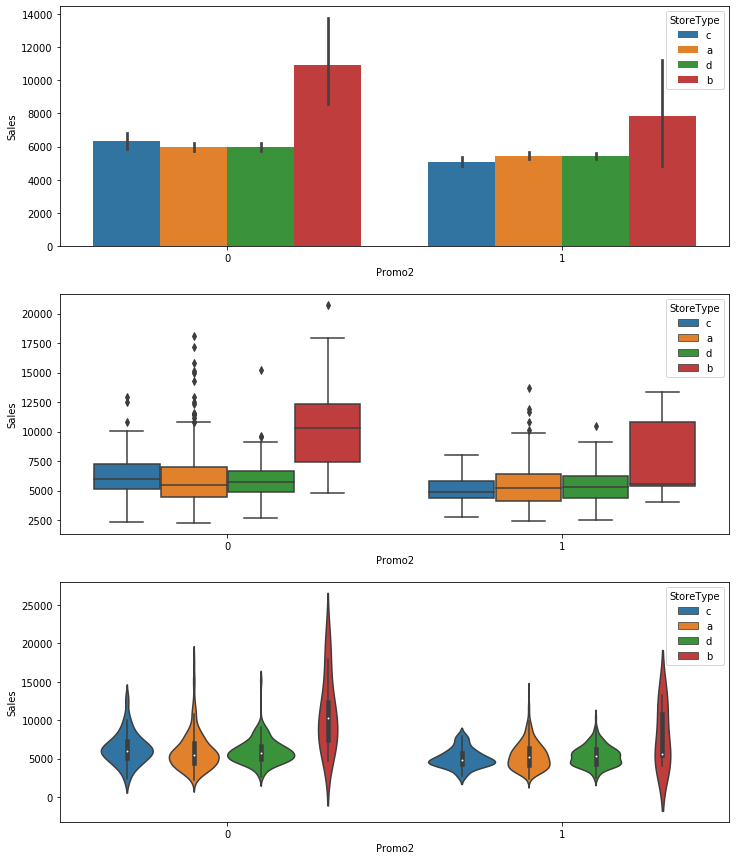

In [103]:
# 观察Promo2和StoreType以及Sales的关系
plotter_mod("Promo2" , "Sales")

# 数据预处理

In [129]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")
data_store = pd.read_csv("./data/store.csv")

data_train['Date']= pd.to_datetime(data_train['Date'])

data_train['Year'] = data_train['Date'].apply(lambda x: x.year)
data_train['Month'] = data_train['Date'].apply(lambda x: x.month)
data_train['Day'] = data_train['Date'].apply(lambda x: x.day)
data_train['DayofYear'] = data_train['Date'].apply(lambda x: x.dayofyear)
data_train['WeekOfYear'] = data_train['Date'].apply(lambda x: x.weekofyear)

data_test['Date']= pd.to_datetime(data_test['Date'])

data_test['Year'] = data_test['Date'].apply(lambda x: x.year)
data_test['Month'] = data_test['Date'].apply(lambda x: x.month)
data_test['Day'] = data_test['Date'].apply(lambda x: x.day)
data_test['DayofYear'] = data_test['Date'].apply(lambda x: x.dayofyear)
data_test['WeekOfYear'] = data_test['Date'].apply(lambda x: x.weekofyear)

In [130]:
#缺失值填充
data_store.fillna(data_store.min()['CompetitionOpenSinceMonth':'CompetitionOpenSinceYear'], inplace=True)
data_store = data_store.fillna(data_store.max()['CompetitionDistance':'CompetitionDistance'])
data_store.fillna(0, inplace=True)
data_test = data_test.fillna(1)

In [131]:
data_train_new = pd.merge(data_train,data_store,on='Store',how='left')
data_test_new = pd.merge(data_test,data_store,on='Store',how='left')

In [132]:
data_train_new.loc[data_train_new.CompetitionOpenSinceYear < 1990, "CompetitionDaysOpen"] = 0

In [133]:
data_train_new["StateHoliday"] = data_train_new["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
data_test_new["StateHoliday"] = data_test_new["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
data_train_new['StateHoliday'] = data_train_new['StateHoliday'].astype(float)
data_test_new['StateHoliday'] = data_test_new['StateHoliday'].astype(float)

In [134]:
data_train_new['StoreType'] = data_train_new['StoreType'].map({'a':0, 'b':1, 'c':2, 'd':3})
data_train_new['Assortment'] = data_train_new['Assortment'].map({'a':0, 'b':1, 'c':2, 'd':3})
data_test_new['StoreType'] = data_test_new['StoreType'].map({'a':0, 'b':1, 'c':2, 'd':3})
data_test_new['Assortment'] = data_test_new['Assortment'].map({'a':0, 'b':1, 'c':2, 'd':3})

In [135]:
groups1 = data_train_new[["Store", "Sales"]].groupby("Store").sum()
groups2 = data_train_new[data_train_new["StateHoliday"] != "0"][["Store", "Sales"]].groupby("Store").sum()
groups = pd.merge(groups1, groups2, on="Store")
groups["SalesHoliday"] = groups["Sales_y"] / groups["Sales_x"]
del groups["Sales_x"], groups["Sales_y"]
data_train_new = pd.merge(data_train_new, groups, how="left", on="Store")
data_test_new = pd.merge(data_test_new, groups, how="left", on="Store")

In [136]:
groups = data_train_new[["Store", "Open"]].groupby("Store").mean()
groups.rename(columns={"Open":"AvgOpen"}, inplace=True)
data_train_new = pd.merge(data_train_new, groups, how="left", on="Store")
data_test_new = pd.merge(data_test_new, groups, how="left", on="Store")

In [137]:
for data in [data_train_new, data_test_new]:
    data["CompetitionOpen"] = 12 * (data.Year - data.CompetitionOpenSinceYear) + (data.Month - data.CompetitionOpenSinceMonth)
    data["PromoOpen"] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data["CompetitionOpen"] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
    data["PromoOpen"] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    data["PromoOpen"][data["Promo2"]==0] = 0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [138]:
data_train_new.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDaysOpen,SalesHoliday,AvgOpen,CompetitionOpen,PromoOpen
0,1,5,2015-07-31,5263,555,1,1,0.0,1,2015,...,2008.0,0,0.0,0.0,0,NaN,1.0,0.829087,82.0,0.00
1,2,5,2015-07-31,6064,625,1,1,0.0,1,2015,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",NaN,1.0,0.832272,92.0,64.50
2,3,5,2015-07-31,8314,821,1,1,0.0,1,2015,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NaN,1.0,0.826964,103.0,52.25
3,4,5,2015-07-31,13995,1498,1,1,0.0,1,2015,...,2009.0,0,0.0,0.0,0,NaN,1.0,0.832272,70.0,0.00
4,5,5,2015-07-31,4822,559,1,1,0.0,1,2015,...,2015.0,0,0.0,0.0,0,NaN,1.0,0.826964,3.0,0.00
5,6,5,2015-07-31,5651,589,1,1,0.0,1,2015,...,2013.0,0,0.0,0.0,0,NaN,1.0,0.828025,19.0,0.00
6,7,5,2015-07-31,15344,1414,1,1,0.0,1,2015,...,2013.0,0,0.0,0.0,0,NaN,1.0,0.834395,27.0,0.00
7,8,5,2015-07-31,8492,833,1,1,0.0,1,2015,...,2014.0,0,0.0,0.0,0,NaN,1.0,0.832272,9.0,0.00
8,9,5,2015-07-31,8565,687,1,1,0.0,1,2015,...,2000.0,0,0.0,0.0,0,NaN,1.0,0.826964,179.0,0.00
9,10,5,2015-07-31,7185,681,1,1,0.0,1,2015,...,2009.0,0,0.0,0.0,0,NaN,1.0,0.832272,70.0,0.00


In [139]:
print(data_train_new.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'DayofYear',
       'WeekOfYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionDaysOpen', 'SalesHoliday', 'AvgOpen', 'CompetitionOpen',
       'PromoOpen'],
      dtype='object')


In [140]:
feature_list = ['SalesHoliday', 'AvgOpen', 'Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'StoreType', 
                'Assortment','Promo2', 'CompetitionDistance', "CompetitionOpen", "PromoOpen"]

In [141]:
data_train_new = data_train_new[(data_train_new["Open"] != 0)&(data_train_new["Sales"] > 0)]

In [142]:
data_train_new['logSales'] = np.log1p(data_train_new['Sales'])
data_train_new['logCustomers'] = np.log1p(data_train_new['Customers'])

In [143]:
val_records = data_train_new[data_train_new['Date'] >= '2015-06-19']
train_records = data_train_new[data_train_new['Date'] < '2015-06-19']

X_train = train_records[feature_list]
y_train = train_records['logSales']

X_val = val_records[feature_list]
y_val = val_records['logSales']

In [144]:
X_test = data_test_new[feature_list]

# 建立和分析模型

In [145]:
def rmspe(y_true, y_pred):
    y_pred = y_pred[y_true != 0]
    y_true = y_true[y_true != 0]
    err = np.sqrt(np.mean((1 - y_pred / y_true) ** 2))
    return err

def rmspe_lgb(y_pred, y):
    y = y.get_label()
    error = rmspe(np.expm1(y), np.expm1(y_pred))
    return "error", error, False

In [156]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'None',
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'max_depth': 100,
    'min_sum_hessian_in_leaf': 0.01
}

In [157]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
start1 = time.time()
gbm = lgb.train(params, lgb_train, num_boost_round=10000, valid_sets=[lgb_eval, lgb_train], valid_names=["valid", "train"],
                early_stopping_rounds=1000, feval=rmspe_lgb)

[1]	train's error: 0.535465	valid's error: 0.483029
Training until validation scores don't improve for 1000 rounds
[2]	train's error: 0.516234	valid's error: 0.463359
[3]	train's error: 0.499425	valid's error: 0.447141
[4]	train's error: 0.482515	valid's error: 0.430746
[5]	train's error: 0.471321	valid's error: 0.41913
[6]	train's error: 0.46018	valid's error: 0.407298
[7]	train's error: 0.45277	valid's error: 0.398804
[8]	train's error: 0.44604	valid's error: 0.39252
[9]	train's error: 0.437331	valid's error: 0.384121
[10]	train's error: 0.431951	valid's error: 0.379093
[11]	train's error: 0.42768	valid's error: 0.375789
[12]	train's error: 0.422495	valid's error: 0.371854
[13]	train's error: 0.417391	valid's error: 0.365894
[14]	train's error: 0.413165	valid's error: 0.361752
[15]	train's error: 0.409667	valid's error: 0.359752
[16]	train's error: 0.405337	valid's error: 0.355033
[17]	train's error: 0.403294	valid's error: 0.356493
[18]	train's error: 0.400464	valid's error: 0.35278

In [45]:
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [127]:
test_close_ind = np.where(data_test_new["Open"] == 0)[0]
y_pred_test[test_close_ind] = 0

result = pd.DataFrame({"Id": data_test_new["Id"], 'Sales': np.expm1(y_pred_test)})
result = result.sort_values('Id')

result.to_csv("rossman_submission1_Xin Zeng.csv", index=False)

In [148]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'None',
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': 100,
    'min_sum_hessian_in_leaf': 0.01
}
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
start1 = time.time()
gbm = lgb.train(params, lgb_train, num_boost_round=10000, valid_sets=[lgb_eval, lgb_train], valid_names=["valid", "train"],
                early_stopping_rounds=1000, feval=rmspe_lgb)

[1]	train's error: 0.535447	valid's error: 0.483031
Training until validation scores don't improve for 1000 rounds
[2]	train's error: 0.516183	valid's error: 0.463381
[3]	train's error: 0.500606	valid's error: 0.447283
[4]	train's error: 0.483934	valid's error: 0.431134
[5]	train's error: 0.469576	valid's error: 0.418152
[6]	train's error: 0.457598	valid's error: 0.406325
[7]	train's error: 0.450463	valid's error: 0.398186
[8]	train's error: 0.442197	valid's error: 0.389343
[9]	train's error: 0.436086	valid's error: 0.382625
[10]	train's error: 0.42932	valid's error: 0.376421
[11]	train's error: 0.425128	valid's error: 0.372913
[12]	train's error: 0.420008	valid's error: 0.368896
[13]	train's error: 0.415759	valid's error: 0.363759
[14]	train's error: 0.411686	valid's error: 0.360268
[15]	train's error: 0.408618	valid's error: 0.358982
[16]	train's error: 0.405833	valid's error: 0.356127
[17]	train's error: 0.403728	valid's error: 0.357815
[18]	train's error: 0.400891	valid's error: 0.

In [149]:
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [70]:
test_close_ind = np.where(data_test_new["Open"] == 0)[0]
y_pred_test[test_close_ind] = 0

result = pd.DataFrame({"Id": data_test_new["Id"], 'Sales': np.expm1(y_pred_test)})
result = result.sort_values('Id')

result.to_csv("rossman_submission2_Xin Zeng.csv", index=False)

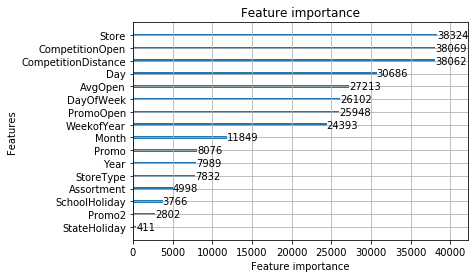

In [104]:
lgb.plot_importance(gbm)

In [158]:
def rmspe_xg(y_pred, y):
    y = y.get_label()
    error = rmspe(np.expm1(y), np.expm1(y_pred))
    return "error", error

In [161]:
xgboost_tree = xgb.XGBRegressor(
    n_estimators = 500,
    learning_rate = 0.1,
    max_depth = 100,
    subsample = 0.8,
    tree_method = 'exact',
    silent = 0
)
xgboost_tree.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_val, y_val)],
                 eval_metric = rmspe_xg, early_stopping_rounds = 50)

[00:56:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.44283	validation_1-rmse:7.45484	validation_0-error:0.999528	validation_1-error:0.999537
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-rmse:6.70006	validation_1-rmse:6.71353	validation_0-error:0.998828	validation_1-error:0.998851
[2]	validation_0-rmse:6.03167	validation_1-rmse:6.04571	validation_0-error:0.997565	validation_1-error:0.997613
[3]	validation_0-rmse:5.43011	validation_1-rmse:5.44435	validation_0-error:0.995441	validation_1-error:0.99553
[4]	validation_0-rmse:4.889	validation_1-rmse:4.90289	validation_0-error:0.992083	validation_1-error:0.992233
[5]	validation_0-rmse:4.40196	validation_1-rmse:4.41516	validation_0-error:0.987064	validation_1-error:0.987291
[6]	validation_0-rmse:3.96383	validation_1-rmse:3.9747

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=100, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=0,
             subsample=0.8, tree_method='exact', verbosity=1)

In [238]:
store_states = pd.read_csv("./data/store_states.csv")

In [239]:
store_states.head(10)

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN
5,6,SN
6,7,SH
7,8,SH
8,9,NW
9,10,"HB,NI"


In [240]:
data_store = pd.read_csv("./data/store.csv")
data_store = data_store.merge(store_states, how='left', left_on = ["Store"], right_on = ["Store"])

In [241]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")

data_train['Date']= pd.to_datetime(data_train['Date'])

data_train['Year'] = data_train['Date'].apply(lambda x: x.year)
data_train['Month'] = data_train['Date'].apply(lambda x: x.month)
data_train['Day'] = data_train['Date'].apply(lambda x: x.day)
data_train['DayofYear'] = data_train['Date'].apply(lambda x: x.dayofyear)
data_train['WeekOfYear'] = data_train['Date'].apply(lambda x: x.weekofyear)

data_test['Date']= pd.to_datetime(data_test['Date'])

data_test['Year'] = data_test['Date'].apply(lambda x: x.year)
data_test['Month'] = data_test['Date'].apply(lambda x: x.month)
data_test['Day'] = data_test['Date'].apply(lambda x: x.day)
data_test['DayofYear'] = data_test['Date'].apply(lambda x: x.dayofyear)
data_test['WeekOfYear'] = data_test['Date'].apply(lambda x: x.weekofyear)

In [242]:
#缺失值填充
data_store.fillna(data_store.min()['CompetitionOpenSinceMonth':'CompetitionOpenSinceYear'], inplace=True)
data_store = data_store.fillna(data_store.max()['CompetitionDistance':'CompetitionDistance'])
data_store.fillna(0, inplace=True)
data_test = data_test.fillna(1)

data_train_new = pd.merge(data_train,data_store,on='Store',how='left')
data_test_new = pd.merge(data_test,data_store,on='Store',how='left')

In [243]:
data_train_new.loc[data_train_new.CompetitionOpenSinceYear < 1990, "CompetitionDaysOpen"] = 0

In [244]:
data_train_new["StateHoliday"] = data_train_new["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
data_test_new["StateHoliday"] = data_test_new["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
data_train_new['StateHoliday'] = data_train_new['StateHoliday'].astype(float)
data_test_new['StateHoliday'] = data_test_new['StateHoliday'].astype(float)

In [245]:
data_train_new['StoreType'] = data_train_new['StoreType'].map({'a':0, 'b':1, 'c':2, 'd':3})
data_train_new['Assortment'] = data_train_new['Assortment'].map({'a':0, 'b':1, 'c':2, 'd':3})
data_test_new['StoreType'] = data_test_new['StoreType'].map({'a':0, 'b':1, 'c':2, 'd':3})
data_test_new['Assortment'] = data_test_new['Assortment'].map({'a':0, 'b':1, 'c':2, 'd':3})

In [246]:
groups1 = data_train_new[["Store", "Sales"]].groupby("Store").sum()
groups2 = data_train_new[data_train_new["StateHoliday"] != "0"][["Store", "Sales"]].groupby("Store").sum()
groups = pd.merge(groups1, groups2, on="Store")
groups["SalesHoliday"] = groups["Sales_y"] / groups["Sales_x"]
del groups["Sales_x"], groups["Sales_y"]
data_train_new = pd.merge(data_train_new, groups, how="left", on="Store")
data_test_new = pd.merge(data_test_new, groups, how="left", on="Store")

In [247]:
groups = data_train_new[["Store", "Open"]].groupby("Store").mean()
groups.rename(columns={"Open":"AvgOpen"}, inplace=True)
data_train_new = pd.merge(data_train_new, groups, how="left", on="Store")
data_test_new = pd.merge(data_test_new, groups, how="left", on="Store")

In [248]:
for data in [data_train_new, data_test_new]:
    data["CompetitionOpen"] = 12 * (data.Year - data.CompetitionOpenSinceYear) + (data.Month - data.CompetitionOpenSinceMonth)
    data["PromoOpen"] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data["CompetitionOpen"] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
    data["PromoOpen"] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    data["PromoOpen"][data["Promo2"]==0] = 0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [249]:
feature_list = ['SalesHoliday', 'AvgOpen', 'Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'StoreType', 
                'Assortment','Promo2', 'CompetitionDistance', "CompetitionOpen", "PromoOpen"]

In [250]:
data_train_new = data_train_new[(data_train_new["Open"] != 0)&(data_train_new["Sales"] > 0)]

In [251]:
data_train_new['logSales'] = np.log1p(data_train_new['Sales'])
data_train_new['logCustomers'] = np.log1p(data_train_new['Customers'])
df_temp = pd.get_dummies(data_train_new["State"])
df_temp["HB_new"] = df_temp["HB,NI"]
df_temp = df_temp.drop(["HB,NI"], axis=1)
feature_list.extend(list(df_temp.columns))
data_train_new = data_train_new.drop(["State"], axis=1)
data_train_new = pd.concat([data_train_new, df_temp], axis=1)

In [252]:
val_records = data_train_new[data_train_new['Date'] >= '2015-06-19']
train_records = data_train_new[data_train_new['Date'] < '2015-06-19']

X_train = train_records[feature_list]
y_train = train_records['logSales']

X_val = val_records[feature_list]
y_val = val_records['logSales']

In [253]:
print(X_train.columns)

Index(['SalesHoliday', 'AvgOpen', 'Store', 'DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'Promo2', 'CompetitionDistance',
       'CompetitionOpen', 'PromoOpen', 'BE', 'BW', 'BY', 'HE', 'HH', 'NW',
       'RP', 'SH', 'SN', 'ST', 'TH', 'HB_new'],
      dtype='object')


In [254]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'None',
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': 100,
    'min_sum_hessian_in_leaf': 0.01
}
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
start1 = time.time()
gbm = lgb.train(params, lgb_train, num_boost_round=10000, valid_sets=[lgb_eval, lgb_train], valid_names=["valid", "train"],
                early_stopping_rounds=1000, feval=rmspe_lgb)

[1]	train's error: 0.536674	valid's error: 0.482052
Training until validation scores don't improve for 1000 rounds
[2]	train's error: 0.512295	valid's error: 0.460384
[3]	train's error: 0.492814	valid's error: 0.441841
[4]	train's error: 0.480828	valid's error: 0.429213
[5]	train's error: 0.466596	valid's error: 0.415739
[6]	train's error: 0.456243	valid's error: 0.404575
[7]	train's error: 0.447673	valid's error: 0.396849
[8]	train's error: 0.440122	valid's error: 0.389829
[9]	train's error: 0.432645	valid's error: 0.382063
[10]	train's error: 0.427674	valid's error: 0.375984
[11]	train's error: 0.423128	valid's error: 0.371627
[12]	train's error: 0.418209	valid's error: 0.36668
[13]	train's error: 0.414862	valid's error: 0.366348
[14]	train's error: 0.409734	valid's error: 0.361927
[15]	train's error: 0.40719	valid's error: 0.364171
[16]	train's error: 0.404677	valid's error: 0.361919
[17]	train's error: 0.401257	valid's error: 0.35897
[18]	train's error: 0.397425	valid's error: 0.35

In [255]:
data_test_new = data_test_new.drop(["State"], axis=1)
data_test_new = pd.concat([data_test_new, df_temp], axis=1)

In [ ]:
X_test = data_test_new[feature_list]
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [ ]:
test_close_ind = np.where(data_test_new["Open"] == 0)[0]
y_pred_test[test_close_ind] = 0

result = pd.DataFrame({"Id": data_test_new["Id"], 'Sales': np.expm1(y_pred_test)})
result = result.sort_values('Id')

result.to_csv("rossman_submission_Xin Zeng.csv", index=False)